**Image Extraction**

In [4]:
# import fitz
# pdf_document = 'pmi.pdf'
# doc = fitz.open(pdf_document)
# image_count = 0

# for page_num in range(doc.page_count):
#     page = doc.load_page(page_num)

#     for img in page.get_images(full=True):
#         #XREF
#         xref = img[0]

#         #bytes
#         base_image = doc.extract_image(xref)
#         image_bytes = base_image["image"]

#         #extension
#         image_ext = base_image["ext"]

#         image_filename = f'image_{image_count}.{image_ext}'
#         with open(image_filename, 'wb') as img_file:
#             img_file.write(image_bytes)

#         print(f"Image saved as: {image_filename}")
#         image_count += 1




Image saved as: image_0.png
Image saved as: image_1.png
Image saved as: image_2.png
Image saved as: image_3.png
Image saved as: image_4.png
Image saved as: image_5.png
Image saved as: image_6.png
Image saved as: image_7.png
Image saved as: image_8.png
Image saved as: image_9.png
Image saved as: image_10.png
Image saved as: image_11.png
Image saved as: image_12.png
Image saved as: image_13.png
Image saved as: image_14.png
Image saved as: image_15.png
Image saved as: image_16.png
Image saved as: image_17.png
Image saved as: image_18.png
Image saved as: image_19.png
Image saved as: image_20.png
Image saved as: image_21.png
Image saved as: image_22.png
Image saved as: image_23.png
Image saved as: image_24.png
Image saved as: image_25.png
Image saved as: image_26.png
Image saved as: image_27.png
Image saved as: image_28.png
Image saved as: image_29.png
Image saved as: image_30.png
Image saved as: image_31.png
Image saved as: image_32.png


**Tables Extraction**

In [6]:
# import tabula

# # Path to the PDF
# pdf_path = 'pmi.pdf'

# # Extract all tables from the PDF into a list of DataFrames
# tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

# # Check the number of tables extracted
# print(f'Total tables extracted: {len(tables)}')

# # Export each table to CSV
# for i, table in enumerate(tables):
#     table.to_csv(f'tabula_table_{i}.csv', index=False)
#     print(f"Table {i} saved as 'tabula_table_{i}.csv'")

# # Access the first table as a DataFrame
# df = tables[0]
# print(df)


Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'
Got stderr: Oct 04, 2024 1:46:42 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO: Your current java version is: 1.8.0_161
Oct 04, 2024 1:46:42 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO: To get higher rendering speed on old java 1.8 or 9 versions,
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   update to the latest 1.8 or 9 version (>= 1.8.0_191 or >= 9.0.4),
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   or
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   use the option -Dsun.java2d.cmm=sun.java2d.cmm.kcms.KcmsServiceProvider
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   or call System.setProperty("sun.java2d.cmm", "sun.java2d.cmm.kcms.KcmsServiceProvider")



Total tables extracted: 39
Table 0 saved as 'tabula_table_0.csv'
Table 1 saved as 'tabula_table_1.csv'
Table 2 saved as 'tabula_table_2.csv'
Table 3 saved as 'tabula_table_3.csv'
Table 4 saved as 'tabula_table_4.csv'
Table 5 saved as 'tabula_table_5.csv'
Table 6 saved as 'tabula_table_6.csv'
Table 7 saved as 'tabula_table_7.csv'
Table 8 saved as 'tabula_table_8.csv'
Table 9 saved as 'tabula_table_9.csv'
Table 10 saved as 'tabula_table_10.csv'
Table 11 saved as 'tabula_table_11.csv'
Table 12 saved as 'tabula_table_12.csv'
Table 13 saved as 'tabula_table_13.csv'
Table 14 saved as 'tabula_table_14.csv'
Table 15 saved as 'tabula_table_15.csv'
Table 16 saved as 'tabula_table_16.csv'
Table 17 saved as 'tabula_table_17.csv'
Table 18 saved as 'tabula_table_18.csv'
Table 19 saved as 'tabula_table_19.csv'
Table 20 saved as 'tabula_table_20.csv'
Table 21 saved as 'tabula_table_21.csv'
Table 22 saved as 'tabula_table_22.csv'
Table 23 saved as 'tabula_table_23.csv'
Table 24 saved as 'tabula_table_2

Chapters segmentation


In [2]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text("text")
    return text

pdf_text = extract_text_from_pdf("pmi.pdf")


**Preprocessing and N grams extraction**

In [3]:
import fitz

# Define the chapters to extract
chapters = {
    "CHAPTER 1": (13, 19),
    "CHAPTER 2": (21, 24),
    "CHAPTER 3": (25, 29),
    "CHAPTER 4": (31, 35),
    "CHAPTER 5": (37, 41),
    "CHAPTER 6": (43, 47),
    "CHAPTER 7": (49, 54),
    "CHAPTER 8": (55, 62),
    "CHAPTER 9": (63, 69)
}

# Function to extract chapters from PDF
def extract_chapters_from_pdf(pdf_path, chapters):
    doc = fitz.open(pdf_path)
    chapter_texts = {}
    unwanted_line = "©2009 Project Management Institute. Practice Standard for Project Risk Management"  # Unwanted line to remove

    for chapter, (start_page, end_page) in chapters.items():
        text = ""
        for page_num in range(start_page - 1, end_page):  # Convert to zero-based index
            page = doc.load_page(page_num)
            page_text = page.get_text()
            # Remove unwanted line if present
            page_text = page_text.replace(unwanted_line, "")
            text += page_text
        chapter_texts[chapter] = text.strip()

    return chapter_texts

# Function to save chapter text to a file
def save_chapter_text(chapter_name, chapter_text):
    with open(f"{chapter_name.replace(' ', '_').lower()}.txt", 'w', encoding='utf-8') as file:
        file.write(chapter_text)

# Main execution
pdf_path = 'pmi.pdf'  # Remplacez par le chemin de votre fichier PDF
chapter_texts = extract_chapters_from_pdf(pdf_path, chapters)

# for chapter_name, chapter_content in chapter_texts.items():
#     save_chapter_text(chapter_name, chapter_content)
#     print(f"{chapter_name} a été sauvegardé avec succès.")


Creer un data frame 

In [4]:
import pandas as pd

# Fonction pour extraire les titres, sous-titres et contenu d'un fichier texte
def extract_sections_from_file(file_path):
    sections = []
    current_title = None
    current_subtitle = None
    current_content = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line and line[0].isdigit() and '.' in line:  # Identifier les titres comme '1.1 Titre'
                if current_title is not None:
                    # Enregistrer la section précédente
                    sections.append({
                        'Titre': current_title,
                        'Sous-titre': current_subtitle if current_subtitle else None,
                        'Contenu': '\n'.join(current_content)
                    })
                # Démarrer une nouvelle section
                parts = line.split(' ', 1)  # Séparer le numéro et le titre
                current_title = parts[0] + ' ' + parts[1] if len(parts) > 1 else parts[0]
                current_subtitle = None
                current_content = []
            elif line.startswith('##'):  # Considérer une ligne qui commence par '##' comme un sous-titre
                if current_subtitle is not None:
                    # Enregistrer la section précédente
                    sections.append({
                        'Titre': current_title,
                        'Sous-titre': current_subtitle,
                        'Contenu': '\n'.join(current_content)
                    })
                current_subtitle = line[2:].strip()  # Enlever '##' du début
                current_content = []
            elif line:  # Ajouter la ligne au contenu si elle n'est pas vide
                current_content.append(line)

        # Enregistrer la dernière section
        if current_title is not None:
            sections.append({
                'Titre': current_title,
                'Sous-titre': current_subtitle if current_subtitle else None,
                'Contenu': '\n'.join(current_content)
            })

    return sections




In [5]:
# for i in range(2, 10):
#     file_path = f'chapters/chapter_{i}.txt'  # Construire le chemin du fichier
#     sections = extract_sections_from_file(file_path)  # Extraire les sections
#     df = pd.DataFrame(sections)  # Créer le DataFrame pour le chapitre actuel
    
#     # Enregistrer le DataFrame en fichier CSV
#     csv_file_path = f'chapter_{i}.csv'
#     df.to_csv(csv_file_path, index=False)  # Enregistrer sans l'index

#     print(f"Chapter {i} saved to {csv_file_path}")

Preprocessing for chapter 1

In [6]:
import pandas as pd
df=pd.read_csv('Chapters csv/chapter_1.csv',index_col=0)

In [23]:
df = df.drop(index=df.index[:5])

In [7]:
import pandas as pd
from spellchecker import SpellChecker


# Initialiser le correcteur orthographique
spell = SpellChecker()



In [8]:
def autocorrect_text(text):
    if isinstance(text, str):  # Vérifier si le contenu est une chaîne de caractères
        corrected_words = []
        for word in text.split():  # Diviser le texte en mots
            if word:  # Vérifier si le mot n'est pas vide
                corrected_word = spell.correction(word)  # Corriger chaque mot
                if corrected_word is not None:  # S'assurer que le correcteur retourne bien une chaîne
                    corrected_words.append(corrected_word)
                else:
                    corrected_words.append(word)  # En cas de problème, garder le mot d'origine
        return ' '.join(corrected_words)  # Recomposer le texte corrigé
    return ''  # Si le texte n'est pas une chaîne (comme None), retourner une chaîne vide

# Vérifier et remplacer explicitement les valeurs None ou NaN par des chaînes vides
df['Contenu'] = df['Contenu'].fillna('')

# Appliquer l'autocorrection sur la colonne 'Contenu'
df['Contenu_corrected'] = df['Contenu'].apply(autocorrect_text)



# Afficher un échantillon du DataFrame corrigé
df.head()

,Sous-titre,Contenu,Contenu_corrected,cleaned_text,token_freq,bigram_freq,trigram_freq,text_without_SW
Titre,,,,,,,,
1.1 Purpose of the Practice Standard for Project Risk Management,NaN,The purpose of the Practice Standard for Proj...,The purpose of the Practice Standard for Proje...,the purpose of the practice standard for proje...,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",purpose practice standard project risk managem...
"1. Introductory material including the framework, purpose, principles, context of, and introduction to",NaN,Project Risk Management processes as deﬁ ned i...,Project Risk Management processes as de need i...,project risk management processes as de need i...,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",project risk management processes de need amok...
2. Principles underlying the six Project Risk Management processes in the PMBOK ® Guide – Fourth,NaN,Edition. The six processes are as follows:\nPl...,edition The six processes are as follows Plan ...,edition the six processes are as follows plan ...,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",edition processes follows plan risk management...
3. A glossary of terms which are used in this practice standard.,NaN,This practice standard emphasizes those princi...,This practice standard emphasizes those princi...,this practice standard emphasizes those princi...,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",practice standard emphasizes principles compre...
1. Principles are expected to be agreed upon now and to be valid in the future. While tools and,NaN,"techniques are constantly evolving, the princi...",techniques are constantly evolving the princip...,techniques are constantly evolving the princip...,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",techniques evolving principles stability persi...


In [28]:
df.to_csv('Chapters csv/chapter_1.csv', index=True)

In [9]:
import re
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['cleaned_text'] = df['Contenu_corrected'].apply(clean_text)
 


In [34]:
df.to_csv('Chapters csv/chapter_1.csv', index=True)

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter

# Assurez-vous que les ressources de NLTK sont téléchargées
nltk.download('punkt')






[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
df.to_csv('Chapters csv/chapter_1.csv', index=False)

As we can see here we still have some stop words such as of , should , be , the , for etc... so we have to make sure that stop words are removed properly

**Adverbs + Determiners + ajectives Removal**

* Here we will further clean our chapters by removing adverbs , determiners and adjectives . But we will keep **nouns** and **verbs** because they are essential to build our knowledge graph later

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import os

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

def clean_text(text):
    stop_words = set(stopwords.words('english'))
    allowed_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

    tokens = word_tokenize(text)

    cleaned_tokens = [
        token for token, pos in pos_tag(tokens)
        if token.lower() not in stop_words and pos in allowed_pos
    ]
    
    # Include digits in cleaned tokens
    cleaned_tokens = [token for token in cleaned_tokens if not token.isdigit() or token in cleaned_tokens]

    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

# Load your DataFrame
 
# Apply the cleaning function to the 'cleaned_text' column
df['text_without_SW'] = df['cleaned_text'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [1]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [14]:
# Function to extract top 10 n-grams
def get_top_n_grams(ngrams_freq, top_n=10):
    # Sort by frequency in descending order and select top n
    return dict(Counter(ngrams_freq).most_common(top_n))

# Function to extract n-grams
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Initialize columns for n-grams frequencies
df['bigram_freq'] = None
df['trigram_freq'] = None
df['token_freq'] = None

In [17]:





# Process the cleaned_text column
for index, row in df.iterrows():
    cleaned_text = row['text_without_SW']
    
    # Tokenize the cleaned text
    tokens = nltk.word_tokenize(cleaned_text)
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Extract bigrams and trigrams
    bigrams = extract_ngrams(lemmatized_tokens, 2)
    trigrams = extract_ngrams(lemmatized_tokens, 3)
    
    # Count frequencies
    bigram_freq = Counter(bigrams)
    trigram_freq = Counter(trigrams)
    token_freq = Counter(lemmatized_tokens)  # Count for tokens as well
    top_bigrams = get_top_n_grams(bigram_freq, top_n=10)
    top_trigrams = get_top_n_grams(trigram_freq, top_n=10)
    top_tokens = get_top_n_grams(token_freq, top_n=10)
    
    # Save the n-grams frequencies in the DataFrame
    df.at[index, 'bigram_freq'] = top_bigrams
    df.at[index, 'trigram_freq'] = top_trigrams
    df.at[index, 'token_freq'] = top_tokens
  

In [18]:
df.to_csv('Chapters csv/chapter_1.csv', index=False)

In [36]:
from collections import Counter

# Initialisation des compteurs globaux
global_token_freq = Counter()
global_bigram_freq = Counter()
global_trigram_freq = Counter()

# Parcourir chaque ligne du DataFrame
for index, row in df.iterrows():
    # Ajouter les fréquences de chaque ligne aux compteurs globaux
    global_token_freq.update(row['token_freq'])
    global_bigram_freq.update(row['bigram_freq'])
    global_trigram_freq.update(row['trigram_freq'])

# Convertir les compteurs en listes de tuples triées par fréquence et prendre les 15 premiers
top_tokens_list = global_token_freq.most_common(15)
top_bigrams_list = global_bigram_freq.most_common(15)
top_trigrams_list = global_trigram_freq.most_common(15)

# Affichage des 15 top résultats
print("Top 15 tokens:", top_tokens_list)
print("Top 15 bigrams:", top_bigrams_list)
print("Top 15 trigrams:", top_trigrams_list)



Top 15 tokens: [('project', 124), ('risk', 88), ('management', 84), ('process', 31), ('practice', 15), ('standard', 13), ('plan', 9), ('edition', 8), ('amok', 7), ('guide', 7), ('principle', 7), ('level', 7), ('value', 7), ('organization', 6), ('conducted', 6)]
Top 15 bigrams: [(('risk', 'management'), 59), (('project', 'risk'), 57), (('project', 'management'), 17), (('management', 'process'), 14), (('practice', 'standard'), 11), (('amok', 'guide'), 7), (('guide', 'edition'), 7), (('management', 'conducted'), 5), (('management', 'project'), 5), (('standard', 'project'), 4), (('project', 'plan'), 4), (('purpose', 'practice'), 3), (('risk', 'project'), 3), (('value', 'project'), 3), (('provide', 'standard'), 2)]
Top 15 trigrams: [(('project', 'risk', 'management'), 48), (('amok', 'guide', 'edition'), 7), (('risk', 'management', 'process'), 6), (('project', 'management', 'process'), 6), (('risk', 'management', 'conducted'), 5), (('management', 'project', 'risk'), 4), (('purpose', 'practic

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

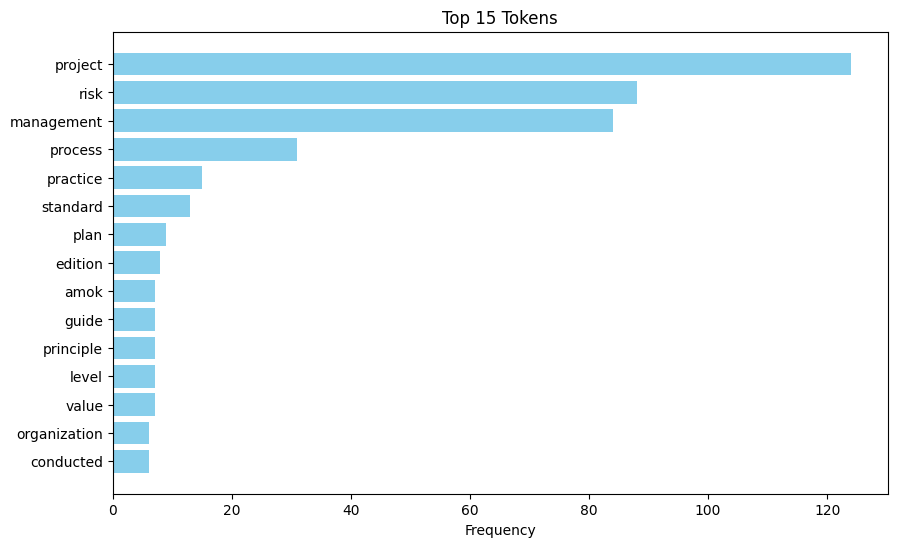

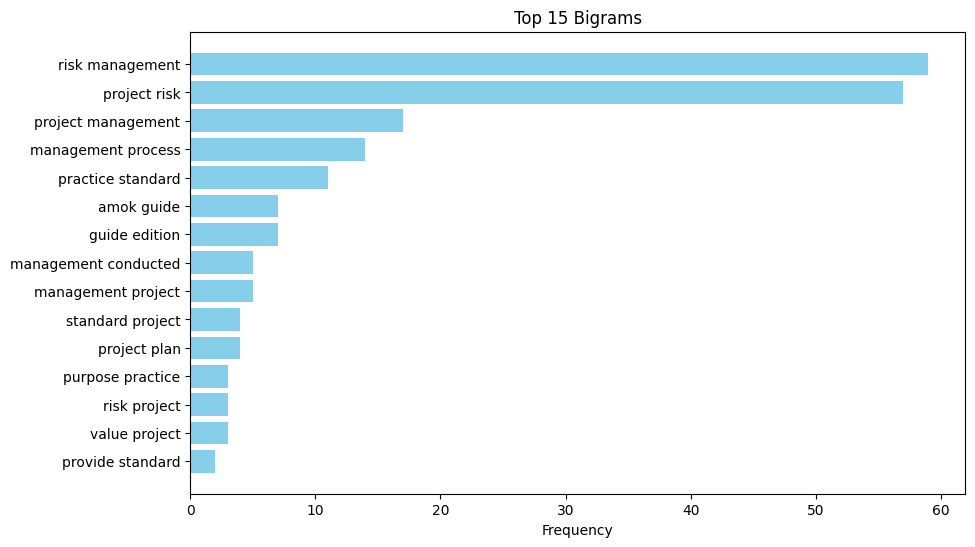

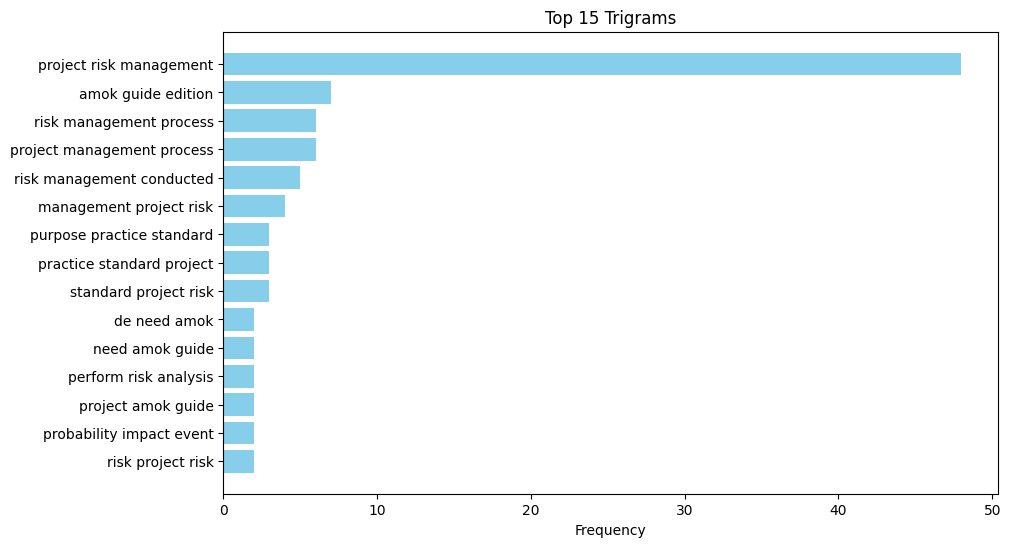

In [22]:
# Function to plot the n-grams frequencies
def plot_ngrams(ngrams, title, xlabel):
    terms, counts = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(terms, counts, color='skyblue')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to show highest frequency on top
    plt.show()

# Plot top tokens
plot_ngrams(top_tokens_list, 'Top 15 Tokens', 'Frequency')

# Plot top bigrams
plot_ngrams([(' '.join(bigram), freq) for bigram, freq in top_bigrams_list], 'Top 15 Bigrams', 'Frequency')

# Plot top trigrams
plot_ngrams([(' '.join(trigram), freq) for trigram, freq in top_trigrams_list], 'Top 15 Trigrams', 'Frequency')

In [81]:
df.to_csv('Chapters csv/chapter_1.csv', index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


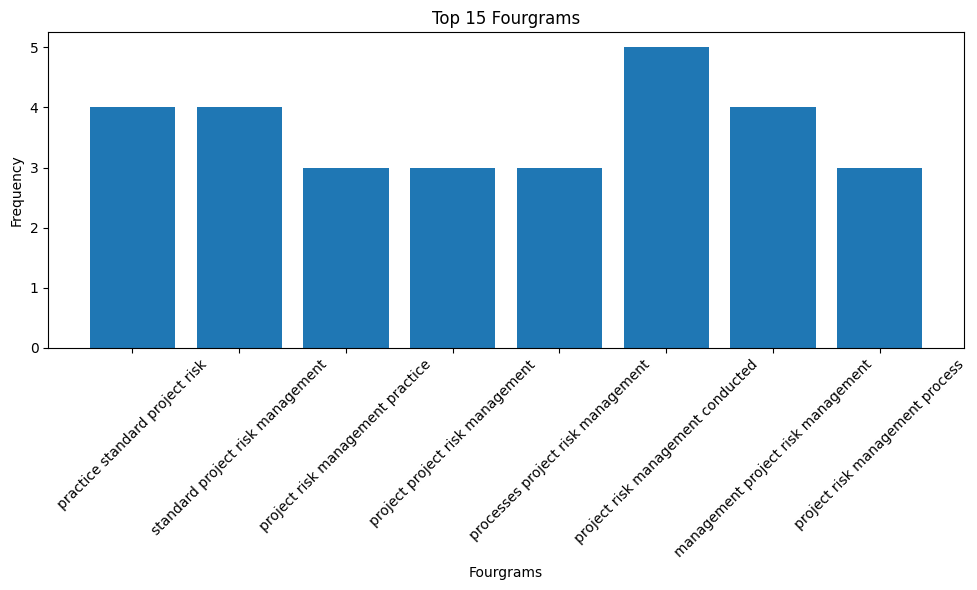

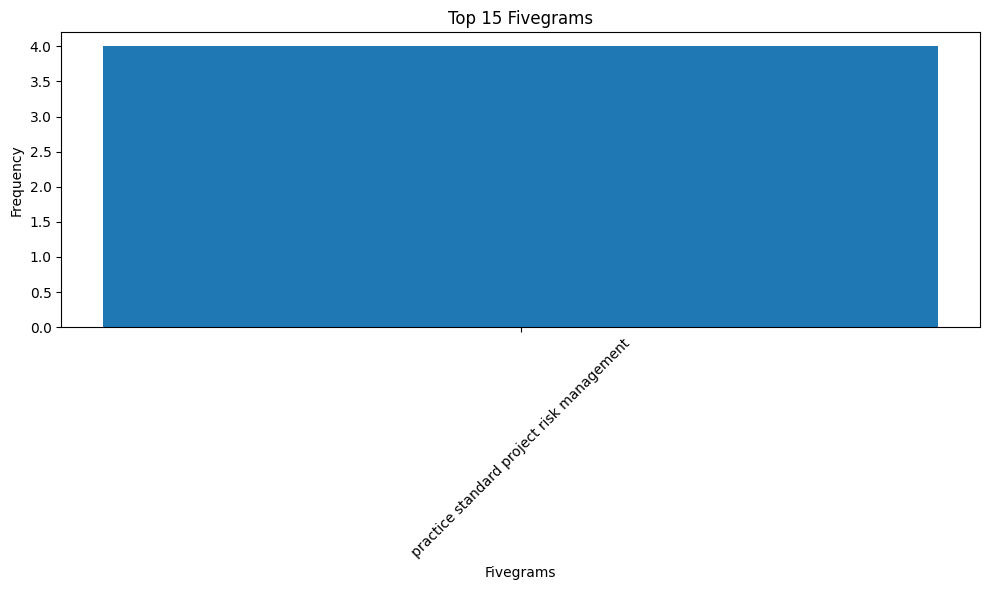

In [26]:
import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Make sure to download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to extract n-grams from cleaned tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Your DataFrame should be loaded here
# Assuming df['text_without_SW'] contains the text you want to analyze
all_tokens = []
all_fourgrams = Counter()
all_fivegrams = Counter()

# Tokenization of 'text_without_SW' column and extraction of n-grams
for text in df['text_without_SW']:
    tokens = nltk.word_tokenize(text)
    all_tokens.extend(tokens)
    
    # Extract n-grams
    fourgrams = extract_ngrams(tokens, 4)
    fivegrams = extract_ngrams(tokens, 5)
    
    # Update counters
    all_fourgrams.update(fourgrams)
    all_fivegrams.update(fivegrams)

# Filter n-grams that appear more than 6 times
filtered_fourgrams = {fourgram: freq for fourgram, freq in all_fourgrams.items() if freq > 2}
filtered_fivegrams = {fivegram: freq for fivegram, freq in all_fivegrams.items() if freq > 2}


# Visualization of Fourgrams
plt.figure(figsize=(10, 6))
plt.bar(range(len(filtered_fourgrams)), list(filtered_fourgrams.values()), align='center')
plt.xticks(range(len(filtered_fourgrams)), [' '.join(fourgram) for fourgram in filtered_fourgrams.keys()], rotation=45)
plt.title('Top 15 Fourgrams')
plt.xlabel('Fourgrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization of Fivegrams
plt.figure(figsize=(10, 6))
plt.bar(range(len(filtered_fivegrams)), list(filtered_fivegrams.values()), align='center')
plt.xticks(range(len(filtered_fivegrams)), [' '.join(fivegram) for fivegram in filtered_fivegrams.keys()], rotation=45)
plt.title('Top 15 Fivegrams')
plt.xlabel('Fivegrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Mesures

### Levenshtein 

In [35]:
combined_text = ' '.join(df['text_without_SW'])

# 2. Créer le vectoriseur TF-IDF
vectorizer = TfidfVectorizer()

# 3. Appliquer le vectoriseur à la chaîne concaténée
tfidf_matrix = vectorizer.fit_transform([combined_text])  # Notez les crochets autour de combined_text

# 4. Convertir en DataFrame pour une meilleure visualisation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les scores TF-IDF
print("TF-IDF Scores for the combined text:")
print(tfidf_df)

# Définir un seuil pour les termes importants
threshold = 0.1  # Ajustez ce seuil selon vos besoins

# Afficher uniquement les termes importants
print(f"\nTerms with TF-IDF scores greater than {threshold}:")
important_terms = {}
for j in range(len(vectorizer.get_feature_names_out())):
    if tfidf_df.iloc[0, j] > threshold:
        important_terms[vectorizer.get_feature_names_out()[j]] = tfidf_df.iloc[0, j]

# Afficher les termes importants
for term, score in important_terms.items():
    print(f"{term}: {score}")

TF-IDF Scores for the combined text:
    accept  according  account  accounting   action  actions  activities  \
0  0.00583    0.00583  0.00583     0.00583  0.00583  0.01749     0.01166   

   activity      add  addition  ...     used   vacuum  validating     value  \
0   0.01166  0.01166   0.01166  ...  0.01166  0.00583     0.00583  0.046639   

    values  venture  ventures      way     ways  workforces  
0  0.00583  0.00583   0.00583  0.01749  0.01166     0.00583  

[1 rows x 361 columns]

Terms with TF-IDF scores greater than 0.1:
management: 0.4955362726708738
practice: 0.10493709303618504
processes: 0.12825644704422617
project: 0.6646015892291719
risk: 0.4605572416588121


In [38]:
with open('results_chapt1.txt', 'w') as f:
    f.write("Top 15 tokens:\n")
    for token in top_tokens_list:
        f.write(f"{token}\n")

    f.write("\nTop 15 bigrams:\n")
    for bigram in top_bigrams_list:
        f.write(f"{bigram}\n")

    f.write("\nTop 15 trigrams:\n")
    for trigram in top_trigrams_list:
        f.write(f"{trigram}\n")

    f.write("\nTerms with TF-IDF scores greater than 0.1:\n")
    for term, score in important_terms.items():
        f.write(f"{term}: {score}\n")

print("Results have been saved to 'results_chap1.txt'")

Results have been saved to 'results_chap1.txt'
